In [67]:
%matplotlib inline

In [18]:
from algo_evaluation.optimization import hill_climbing as hc
from algo_evaluation.optimization import genetic_optimize as ga
reload(ga)

<module 'algo_evaluation.optimization.genetic_optimize' from '/Users/sshegheva/workspace/bag-of-algorithms/algo_evaluation/optimization/genetic_optimize.py'>

In [4]:
from algo_evaluation.optimization.problems.waldo_optimization import make_waldo_optimization_problem

In [4]:
from algo_evaluation.datasets import load_waldo_dataset

In [5]:
waldo_df = load_waldo_dataset()

In [1]:
from algo_evaluation.optimization.problems import waldo_optimization as wo

In [7]:
wop = make_waldo_optimization_problem(waldo_df)

In [6]:
rhc_df, sa_df, ga_df = wo.compare_all(waldo_df)

TypeError: 'NoneType' object is not iterable

In [10]:
domain = []
for i in range(len(waldo_df)):
    domain.append((1.0, 7.0))
    domain.append((1.0, 12.0))

In [45]:
import math
def calculate_distance(x1, y1, x2, y2):
    """
        Returns the Euclidean distance between points (x1, y1) and (x2, y2)
    """
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def waldo_coord(book, page):
    return waldo_df[(waldo_df['Book'] == book) & (waldo_df['Page'] == page)]

def compute_fitness(solution):
    """
        Computes the distance that the Waldo-seeking solution covers.

        Lower distance is better, so the GA should try to minimize this function.
    """
    solution_fitness = 0.0
    solution_pair = zip(*(iter(solution),) * 2)
    for index in range(1, len(solution_pair)):
        book1, page1 = solution_pair[index]
        book2, page2 = solution_pair[index-1]
        w1 = waldo_coord(book1, page1)
        w2 = waldo_coord(book2, page2)
        if w1.empty:
            continue
        if w2.empty:
            continue
        solution_fitness += calculate_distance(w1.X.iloc[0], w1.Y.iloc[0], w2.X.iloc[0], w2.Y.iloc[0])
    return solution_fitness

In [13]:
result = hc.hillclimb(domain, compute_fitness)

In [69]:
reload(ga)
#result = ga.genetic_optimize(domain, compute_fitness)

<module 'algo_evaluation.optimization.genetic_optimize' from '/Users/sshegheva/workspace/bag-of-algorithms/algo_evaluation/optimization/genetic_optimize.py'>

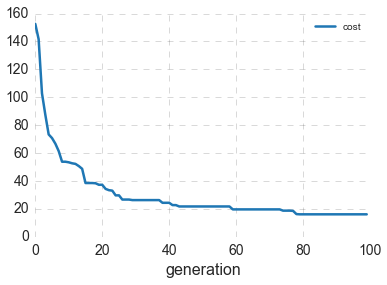

In [68]:
result[['generation', 'cost']].set_index('generation').plot()

In [48]:
p = [[6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [2, 8, 3, 8, 6, 10, 6, 5, 5, 12, 3, 12, 4, 5, 2, 11, 7, 11, 5, 2, 3, 5, 7, 9, 2, 3, 1, 11, 6, 4, 2, 8, 5, 10, 3, 7, 6, 3, 7, 2, 5, 2, 2, 2, 7, 5, 2, 3, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 4, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 3, 7, 1, 1, 12, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 12, 6, 9, 6, 4, 6, 6, 5, 9], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 2, 7, 5, 2, 3, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 4, 7, 6, 6, 2, 5, 3, 8, 5, 7, 3, 5, 7, 1, 1, 1, 5, 12, 7, 1, 5, 7, 2, 12, 5, 11, 4, 12, 6, 9, 6, 4, 6, 6, 5, 9], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 4, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 3, 7, 1, 1, 12, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 12, 6, 8, 6, 4, 6, 6, 5, 9], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 3, 7, 1, 1, 12, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 12, 6, 9, 6, 4, 6, 6, 5, 9], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 2, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 4, 7, 6, 6, 2, 5, 3, 8, 5, 7, 3, 5, 7, 1, 1, 1, 5, 12, 7, 1, 5, 7, 2, 12, 5, 11, 4, 12, 6, 9, 6, 4, 6, 6, 5, 9], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 12, 6, 9, 6, 4, 6, 6, 5, 9], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 4, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 4, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 3, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], None, [1, 8, 4, 12, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [2, 8, 3, 8, 6, 10, 6, 5, 5, 12, 3, 12, 4, 5, 2, 11, 7, 11, 5, 2, 3, 5, 7, 9, 2, 3, 1, 11, 6, 4, 2, 8, 5, 10, 3, 7, 6, 3, 7, 2, 5, 2, 2, 2, 7, 5, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 3, 7, 1, 1, 12, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 7, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 10, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 4, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 4, 7, 6, 6, 2, 5, 3, 8, 5, 7, 3, 5, 7, 1, 1, 1, 5, 12, 7, 1, 5, 7, 2, 12, 5, 11, 4, 12, 6, 9, 6, 4, 6, 6, 5, 9], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 2, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 3, 7, 1, 1, 12, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 10, 2, 7, 2, 12, 1, 11, 3, 10, 7, 3, 7, 9, 5, 5, 5, 4, 3, 11, 6, 4, 1, 3, 6, 12, 6, 9, 6, 4, 6, 6, 5, 9], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 2, 10, 6, 11, 5, 8, 1, 8, 4, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 7, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 5, 8, 5, 6, 6, 8, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 8, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 4, 2, 2, 7, 7, 2, 4, 5, 10, 2, 4, 7, 9, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 4, 6, 10, 7, 10, 6, 7, 2, 11, 6, 2, 1, 12, 7, 7, 1, 5, 7, 8, 2, 11, 7, 2, 1, 12, 3, 9, 1, 1, 7, 4, 6, 1, 4, 1, 2, 7, 4, 1, 4, 6, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 9, 2, 3, 1, 11, 6, 4, 2, 8, 5, 10, 3, 7, 6, 3, 7, 2, 5, 2, 2, 2, 7, 5, 2, 3, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 3, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 4, 7, 6, 6, 2, 5, 3, 8, 5, 7, 3, 5, 7, 1, 1, 1, 5, 12, 7, 1, 5, 7, 2, 12, 5, 11, 4, 12, 6, 9, 6, 4, 6, 6, 5, 9], [6, 10, 2, 9, 6, 4, 4, 11, 7, 10, 6, 9, 6, 4, 4, 8, 3, 4, 5, 8, 2, 2, 1, 9, 5, 9, 3, 6, 3, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 3, 5, 6, 7, 4, 9, 2, 7, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 7, 4, 2, 5, 1, 9, 7, 4, 3, 11, 3, 12, 4, 12, 5, 8, 4, 8, 3, 4, 7, 4, 4, 8, 6, 2, 6, 9, 3, 5, 6, 5, 7, 4, 4, 10, 3, 6, 6, 3, 7, 8, 5, 6, 7, 12, 5, 9, 1, 1, 1, 6, 7, 4, 7, 3, 3, 4, 1, 2, 3, 3, 7, 3, 3, 10, 6, 11, 5, 8, 1, 8, 4, 8, 6, 12, 7, 9, 5, 7, 5, 6, 4, 12, 5, 4, 7, 9, 3, 7, 6, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3], [1, 8, 4, 12, 5, 12, 1, 11, 2, 12, 6, 7, 4, 5, 2, 11, 7, 11, 5, 2, 3, 5, 7, 9, 2, 3, 1, 11, 6, 4, 2, 8, 5, 10, 3, 7, 6, 3, 7, 2, 5, 2, 2, 2, 7, 5, 2, 3, 7, 5, 4, 10, 3, 9, 6, 4, 1, 7, 2, 3, 2, 1, 2, 2, 5, 12, 6, 4, 7, 6, 6, 2, 1, 6, 6, 10, 1, 5, 2, 10, 3, 5, 5, 7, 2, 8, 7, 7, 7, 12, 6, 11, 5, 10, 7, 5, 1, 2, 3, 5, 7, 9, 4, 11, 4, 4, 7, 9, 7, 12, 3, 4, 7, 1, 3, 1, 2, 10, 7, 10, 2, 12, 3, 12, 7, 8, 6, 7, 7, 12, 3, 10, 5, 9, 4, 3]]

In [39]:
len(p)

50

In [51]:
for i,n  in enumerate(p):
    if n == None:
        print i

23


In [59]:
mutation = [1, 7, 2, 9, 1, 2, 3, 4, 5, 10, 7, 8, 5, 1, 7, 4, 3, 4, 7, 4, 1, 10, 5, 2, 6, 3, 5, 6, 7, 3, 1, 11, 5, 10, 3, 12, 5, 11, 6, 8, 2, 12, 1, 1, 1, 11, 3, 3, 3, 2, 4, 8, 4, 12, 1, 8, 3, 4, 4, 7, 2, 2, 7, 10, 5, 6, 7, 8, 3, 11, 5, 8, 7, 6, 1, 6, 7, 11, 6, 1, 7, 2, 6, 6, 6, 8, 7, 12, 3, 9, 7, 6, 7, 9, 3, 5, 7, 5, 2, 4, 2, 8, 4, 1, 2, 10, 2, 8, 5, 9, 1, 1, 4, 3, 1, 1, 4, 4, 4, 8, 2, 7, 1, 4, 5, 1, 2, 1, 2, 3, 3, 6, 1, 4, 7, 6]
random = 82
#7 1.0 7.0

In [60]:
mutation[82]

6

In [61]:
domain[82]

(1.0, 7.0)

In [62]:
len(domain)

136

In [63]:
domain

[(1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 (1.0, 7.0),
 (1.0, 12.0),
 